In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores

from transformers import AlbertModel

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../_data/fig-symmetry-language-models/ALBERT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [11]:
path = ["encoder.albert_layer_groups[", "].albert_layers[0].attention.query.weight", "].albert_layers[0].attention.key.weight"]

'ALBERT base model (l = 12, d = 768, h = 12 ; tot num parameters 11M)'
dh = 64
l = 1
d = 768
h = d // dh

model = AlbertModel.from_pretrained("albert-base-v2")
score_List= get_scores(d, l, h, dh, model, path)
models['ABERT-base'] = [l, d, h, dh, score_List]

'ALBERT large model (l = 24, d = 1024, h = 16 ; tot num parameters 17M)'
dh = 64
l = 1
d = 1024
h = d // dh

model = AlbertModel.from_pretrained("albert-large-v2")
score_List= get_scores(d, l, h, dh, model, path)
models['ALBERT-large'] = [l, d, h, dh, score_List]

'ALBERT xlarge model (l = 24, d = 2048, h = 16 ; tot num parameters 58M)'
dh = 64
l = 1
d = 2048
h = d // dh

model = AlbertModel.from_pretrained("albert-xlarge-v2")
score_List= get_scores(d, l, h, dh, model, path)
models['ALBERT-xlarge'] = [l, d, h, dh, score_List]

'ALBERT xxlarge model (l = 12, d = 4096, h = 64 ; tot num parameters 223M)'
dh = 64
l = 1
d = 4096
h = d // dh

model = AlbertModel.from_pretrained("albert-xxlarge-v2")
score_List= get_scores(d, l, h, dh, model, path)
models['ALBERT-xxlarge'] = [l, d, h, dh, score_List]

In [12]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

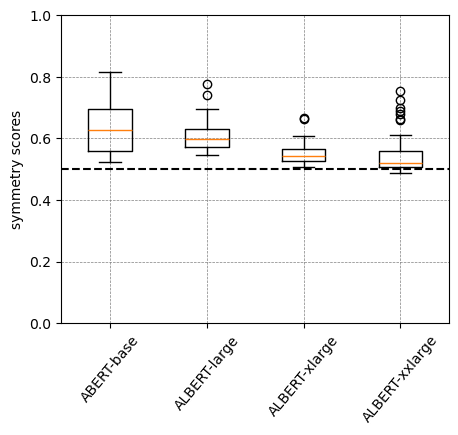

In [13]:
## boxplot visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(5,4))

plt.boxplot(SList)

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('symmetry scores')
plt.xticks(np.arange(1,len(names)+1),names)
plt.xticks(rotation=50)
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')

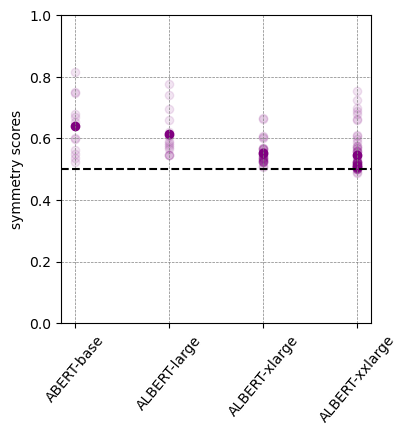

In [14]:
## mean and scatter visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(4,4))

for i, model in enumerate(SList):
    
    plt.scatter(i*np.ones(SList[i].size),(SList[i].flatten()),color='purple',alpha=.1)
    plt.scatter(i,(SList[i].flatten()).mean(),color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('symmetry scores')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation=50)
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ABERT-base'),
  Text(1, 0, 'ALBERT-large'),
  Text(2, 0, 'ALBERT-xlarge'),
  Text(3, 0, 'ALBERT-xxlarge')])

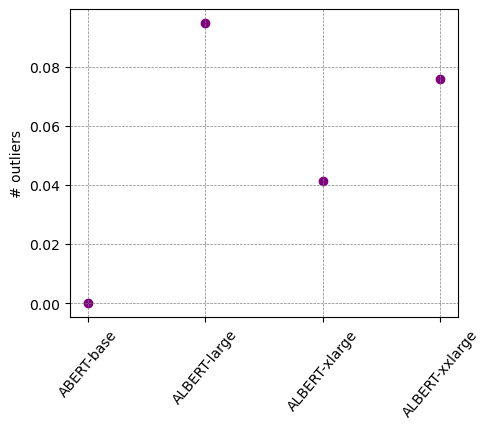

In [15]:
## percentage of outliers visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(5,4))

for i, model in enumerate(SList):
    
    outliers = count_outliers(SList[i].flatten())
    plt.scatter(i, outliers.sum() / SList[i].size, color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('# outliers')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation = 50)

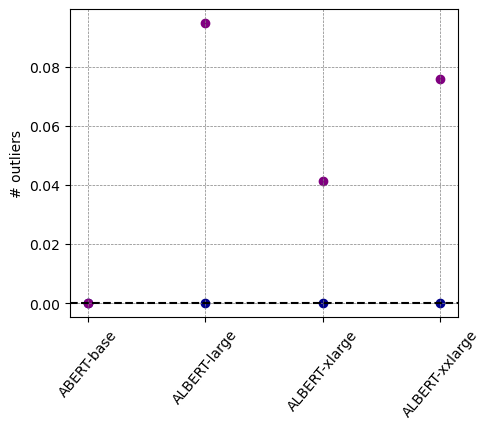

In [16]:
## percentage of outliers visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(5,4))

for i, model in enumerate(SList):
    
    outliers = count_outliers(SList[i].flatten())
    plt.scatter(i, outliers[outliers < .5].sum() / SList[i].size, color='darkblue')
    plt.scatter(i, outliers[outliers > .5].sum() / SList[i].size, color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('# outliers')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation = 50)
plt.axhline(y = .0,color='k',linestyle='dashed')